In [1]:
import sys, os

hostname = os.uname()[1]

if "crc" in hostname:
    scriptdir = "/cr/users/filip/bin/"
    basedir = "/cr/data01/filip/.history/"
elif "beep-boop" == hostname:
    scriptdir = "/home/quizznor/projects/phd-thesis/bin/"
    basedir = "/home/quizznor/projects/phd-thesis/bin/"

sys.path.append(scriptdir)

from utils.binaries import *
from utils.plotting import *

13:25:06 [INFO] utils          -- ( +8880ms) -- import logging
13:25:06 [INFO] utils.binaries -- (   +99ms) -- import numpy as np
13:25:06 [INFO] utils.binaries -- (  +226ms) -- import pandas as pd
13:25:06 [INFO] utils.binaries -- (    +2ms) -- import binaries.tools as tools
13:25:06 [INFO] utils.plotting -- (  +348ms) -- import matplotlib.pyplot as plt
13:25:07 [INFO] utils.plotting -- (  +216ms) -- import seaborn as so
13:25:07 [DBUG] utils.plotting -- (    +7ms) -- font size set to 4
13:25:07 [DBUG] utils.plotting -- (    +0ms) -- figure size set to [2.4, 1.2]
13:25:07 [DBUG] utils.plotting -- (    +1ms) -- plotting style set to `notebook`.
13:25:07 [INFO] utils.plotting -- (    +1ms) -- import plotting.tools as plot


In [2]:
import pickle
import datetime

def add_to_dict(original, new):

    for key, value in new.items():
        try:
            original[key] += value
        except KeyError:
            original[key] = value

    return original

def get_timestamps(original, timestamp):

    new = {}

    for key, value in original.items():
        new[key] = [timestamp + np.random.randint(3600) for _ in range(value)]
    
    return new

all_of_history = {}

for hour in os.listdir(basedir):
    if hour == "README.md": continue
    timestamp = datetime.datetime(*[int(i) for i in hour[:-7].split("_")]).timestamp() + np.random.randint(3600)

    with open(basedir + hour, "rb") as f: 
        history = pickle.load(f)

    timestamps = get_timestamps(history, timestamp)
    all_of_history = add_to_dict(all_of_history, timestamps)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


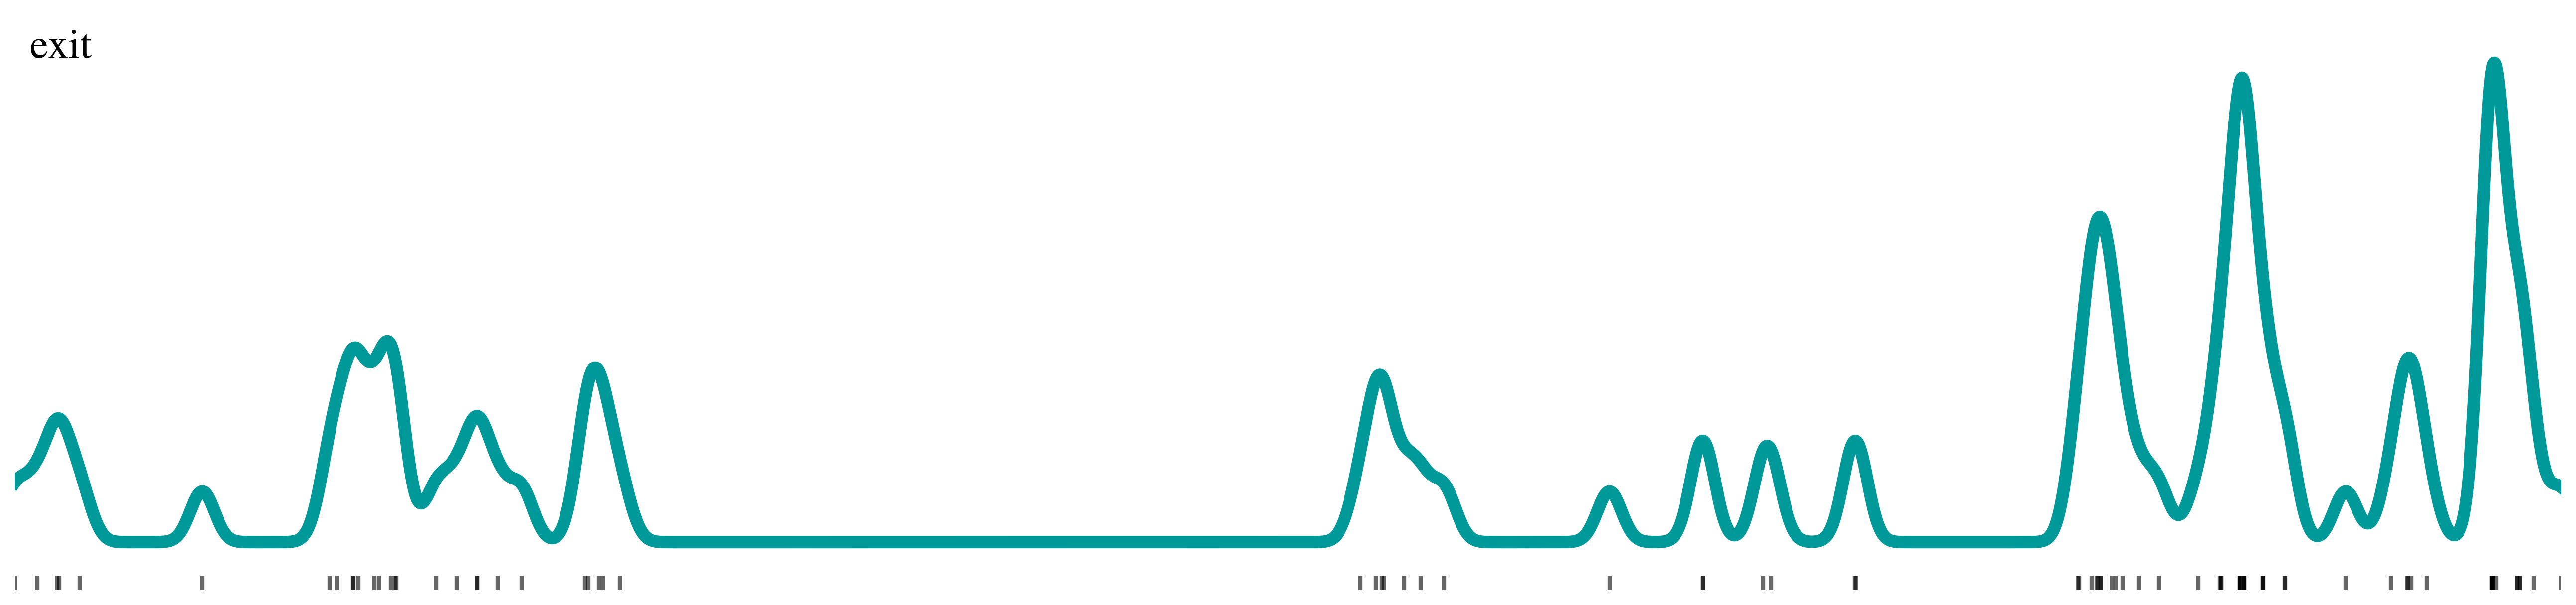

In [22]:
data = all_of_history["exit"]

line = tools.kd1d_estimate(data, bandwidth=5e4)
X = np.linspace(min(data), max(data), 10000)

plt.rcParams["figure.figsize"] = [11, 2.5]
plt.plot(X, line(X), lw=3, c="#009999")
plt.xlim(X[0], X[-1])
# plt.ylim(-0.01)
plt.xticks([])
plt.yticks([])
plt.axis("off")
so.rugplot(data, c="k", alpha=0.6)
plt.legend(loc="upper left", title="exit", title_fontsize=10)